<a href="https://colab.research.google.com/github/AntonioMenezes07/EDA---Analise-dos-Acidentes-em-Rodovias-e-Posicionamento-de-Radares/blob/main/EDA_An%C3%A1lise_dos_Acidentes_em_Rodovias_e_Posicionamento_de_Radares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1 - Entendimento do Problema de Negócio**

Imagine que estamos investigando como os radares nas estradas afetam a segurança e o tráfego. Queremos entender se eles realmente ajudam a evitar acidentes e como podem ser melhorados.

Vamos usar dados do governo para ver onde acontecem mais acidentes e onde estão os radares. A ideia é descobrir se os radares estão nos lugares certos e se estão fazendo nosso trânsito mais seguro.

Queremos sugerir maneiras de tornar nossas estradas mais seguras e eficientes para todos nós. Vamos utilizar esses números para descobrir como podemos melhorar a qualidade do transito nas estradas do nosso país.

Ao realizar uma análise de dados sobre acidentes em rodovias e o posicionamento de radares, há várias questões de negócio adicionais que você pode explorar para obter insights úteis e oferecer sugestões para melhorias.

1. **Análise de Eficiência dos Radares:** Além de avaliar a eficácia dos radares em geral, analisar a eficiência de radares em áreas específicas ou em diferentes tipos de rodovias (por exemplo, estradas simples versus estradas duplicadas).

2. **Identificação de Pontos Críticos:** Identificar os locais onde ocorrem mais acidentes e avaliar se radares estão presentes nesses pontos. Isso pode ajudar a determinar se os radares estão posicionados nos lugares certos.

3. **Correlação entre Radares e Acidentes:** Realizar uma análise estatística para identificar se há uma correlação significativa entre a presença de radares em determinadas áreas e a redução da frequência de acidentes.

4. **Análise de Velocidade Média:** Analisar a velocidade média dos veículos em diferentes trechos de rodovia com e sem radares. Isso pode ajudar a entender se os radares estão influenciando o comportamento dos motoristas.

5. **Avaliação de Impacto Econômico:** Além da segurança, considerar o impacto econômico dos acidentes, como custos médicos, perda de produtividade e danos materiais. Isso pode ajudar a justificar investimentos em radares.



### **importando as bibliotecas**

In [3]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from IPython.display import display


# **2 - entendimento dos dados**

 ## **2.1 - Dados Acidentes Rodovias PRF**

Os dados de acidentes de trânsito utilizados neste estudo foram coletados da [base pública da Polícia Rodoviária Federal (PRF)](https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf) e abrangem o ano 2023. Essa base oficial e de acesso público contém registros abrangentes de acidentes ocorridos nas rodovias de todo o Brasil durante esse intervalo.

Essas informações representam um recurso fundamental para nossa análise, possibilitando uma compreensão aprofundada e embasada sobre a segurança nas estradas. A disponibilidade desses dados contribui significativamente para tomadas de decisões informadas e a implementação de medidas que visam aprimorar a segurança viária em todo o país.

###**importando a base de dados da PRF**

In [4]:
df_prf = pd.read_csv('/content/datatran2023.csv', sep = ';', encoding = 'latin1')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df_prf.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,496519,2023-01-01,domingo,02:00:00,ES,101,114,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,1,0,1,0,0,0,1,1,"-19,09484877","-40,05095848",SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,496543,2023-01-01,domingo,03:40:00,SP,116,"113,1",TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,5,1,0,0,0,4,0,2,"-23,0445658","-45,58259814",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,496590,2023-01-01,domingo,01:40:00,MT,163,1112,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,NaN,Plena Noite,Crescente,Ignorado,Simples,Curva;Declive,Não,2,0,0,1,0,2,1,3,"-9,70020602","-54,87588757",SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,496610,2023-01-01,domingo,10:40:00,PR,376,"314,8",ORTIGUEIRA,Velocidade Incompatível,Tombamento,Sem Vítimas,Pleno dia,Crescente,Sol,Dupla,Curva,Não,2,0,0,0,1,2,0,3,"-23,985512","-51,083555",SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,496659,2023-01-01,domingo,14:55:00,MG,116,"569,4",MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Simples,Declive;Curva,Não,4,0,0,2,1,1,2,3,"-20,10007457","-42,17884091",SPRF-MG,DEL06-MG,UOP03-DEL06-MG


### **tratando dados**

#### **metadados**

In [6]:
# Criar variável para metadados

def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata = metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

In [7]:
generate_metadata(df_prf)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,id,int64,0,0.00,67766
1,veiculos,int64,0,0.00,22
2,br,int64,0,0.00,119
3,feridos,int64,0,0.00,40
4,ignorados,int64,0,0.00,19
5,ilesos,int64,0,0.00,53
6,feridos_graves,int64,0,0.00,16
7,feridos_leves,int64,0,0.00,35
8,mortos,int64,0,0.00,8
9,pessoas,int64,0,0.00,62


#### **colunas a serem tratadas**

- data_inversa -- datetime
- horario -- datetime
- km -- trocado a ',' pelo '.' e foi dividido na coluna km e m
- latitude -- trocado a ',' pelo '.'
- longitutde -- trocado a ',' pelo '.'
- delegacia -- tratado os nulos como 'desconhecido'
- regional  -- tratado os nulos como 'desconhecido'
- uop  -- tratado os nulos como 'desconhecido'

In [8]:
#data_inversa
df_prf['data_inversa'] = pd.to_datetime(df_prf['data_inversa'], format='%Y-%m-%d')

#horario
df_prf['horario'] = pd.to_datetime(df_prf['horario'], format='%H:%M:%S')

#km
# Replace comma with dot and convert to float
df_prf['km'] = df_prf['km'].astype(str).str.replace(',', '.').astype(float)
# Divide the 'km' column into 'km' and 'm' based on the decimal point
df_prf[['km', 'm']] = df_prf['km'].apply(lambda x: str(x).split('.', 1) if pd.notna(x) else ['0', '0']).apply(pd.Series)
# Convert the 'km' and 'm' columns to int64
df_prf['km'] = df_prf['km'].astype(int)
df_prf['m'] = df_prf['m'].astype(int)
# Replace 0 values in 'km' and 'm' with 'desconhecido' after converting to string
df_prf['km'] = df_prf['km'].astype(str).replace('0', 'desconhecido')
df_prf['m'] = df_prf['m'].astype(str).replace('0', 'desconhecido')


#latitude
df_prf['latitude'] = df_prf['latitude'].astype(str).str.replace(',', '.').astype(float)

#longitude
df_prf['longitude'] = df_prf['longitude'].astype(str).str.replace(',', '.').astype(float)

#delegacia
df_prf['delegacia'] = df_prf['delegacia'].fillna('desconhecido')

#regional
df_prf['regional'] = df_prf['regional'].fillna('desconhecido')

#uop
df_prf['uop'] = df_prf['uop'].fillna('desconhecido')

In [9]:
df_prf.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,m
0,496519,2023-01-01,domingo,1900-01-01 02:00:00,ES,101,114,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,1,0,1,0,0,0,1,1,-19.094849,-40.050958,SPRF-ES,DEL04-ES,UOP01-DEL04-ES,desconhecido
1,496543,2023-01-01,domingo,1900-01-01 03:40:00,SP,116,113,TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,5,1,0,0,0,4,0,2,-23.044566,-45.582598,SPRF-SP,DEL02-SP,UOP02-DEL02-SP,1
2,496590,2023-01-01,domingo,1900-01-01 01:40:00,MT,163,1112,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,NaN,Plena Noite,Crescente,Ignorado,Simples,Curva;Declive,Não,2,0,0,1,0,2,1,3,-9.700206,-54.875888,SPRF-MT,DEL06-MT,UOP03-DEL06-MT,desconhecido
3,496610,2023-01-01,domingo,1900-01-01 10:40:00,PR,376,314,ORTIGUEIRA,Velocidade Incompatível,Tombamento,Sem Vítimas,Pleno dia,Crescente,Sol,Dupla,Curva,Não,2,0,0,0,1,2,0,3,-23.985512,-51.083555,SPRF-PR,DEL07-PR,UOP02-DEL07-PR,8
4,496659,2023-01-01,domingo,1900-01-01 14:55:00,MG,116,569,MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Simples,Declive;Curva,Não,4,0,0,2,1,1,2,3,-20.100075,-42.178841,SPRF-MG,DEL06-MG,UOP03-DEL06-MG,4


## **2.2 - Dados Radares Rodovias Federais.**

**Sobre os dados dos Radares nas Rodovias Federais.**

Os dados sobre os radares de trânsito nas rodovias federais do Brasil são acessíveis ao público por meio do portal "Dados.gov.br" do governo federal. Para acessar os dados dos radares de trânsito nas rodovias federais, você pode utilizar o seguinte link: [Acesso aos Dados de Radares](https://dados.gov.br/dados/conjuntos-dados/radar). Essas informações são fornecidas pela Agência Nacional de Transportes Terrestres (ANTT), uma entidade responsável por regulamentar e fiscalizar o transporte terrestre no país.

As concessionárias de rodovias coletam e inserem os dados sobre os radares, que são posteriormente disponibilizados na rede da ANTT. Isso permite o acesso público a informações importantes, como a localização e a operação dos radares, contribuindo para a segurança viária e a tomada de decisões embasadas em dados.

Essa iniciativa demonstra o compromisso do governo com a segurança nas rodovias federais e a importância de dados acessíveis para a melhoria da mobilidade e a prevenção de acidentes.

### **importando a base de dados**

In [10]:
df_radar = pd.read_csv('/content/dados_dos_radares (1).csv', sep = ';', encoding = 'latin1')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
df_radar.head()

,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,latitude,longitude,velocidade_leve,velocidade_pesado
0,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,SP,"78,200",São Paulo,Principal,Crescente,Ativo,NaN,"-23,401335","-46,575964",80,60
1,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,SP,"76,400",São Paulo,Principal,Decrescente,Ativo,NaN,"-23,387687","-46,569328",80,60
2,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,SP,"75,650",São Paulo,Principal,Crescente,Ativo,NaN,"-23,384708","-46,564716",80,60
3,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,SP,"73,060",São Paulo,Principal,Decrescente,Ativo,NaN,"-23,368741","-46,554044",80,60
4,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,SP,"70,200",Mairiporã,Principal,Decrescente,Ativo,NaN,"-23,349188","-46,556532",80,60


In [12]:
df_radar.shape

(961, 15)

### **tratamento dos dados**

#### **metadados**

In [13]:
generate_metadata(df_radar)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,ano_do_pnv_snv,int64,0,0.0,11
1,velocidade_leve,int64,0,0.0,9
2,velocidade_pesado,int64,0,0.0,8
3,data_da_inativacao,float64,961,100.0,0
4,concessionaria,object,0,0.0,25
5,tipo_de_radar,object,0,0.0,2
6,rodovia,object,0,0.0,31
7,uf,object,0,0.0,14
8,km_m,object,0,0.0,889
9,municipio,object,0,0.0,270


#### **colunas a serem tratadas**

- ano_do_pnv_snv -- datetime
- km_m -- foi separado na columa km e na columa metros
- data_da_inativacao -- excluir a coluna
- latitude -- trocado a ',' pelo '.'
- longitude -- trocado a ',' pelo '.'

In [14]:
#ano do pnv snv
df_radar['ano_do_pnv_snv'] = pd.to_datetime(df_radar['ano_do_pnv_snv'], format='%Y')

#km_m
df_radar[['km', 'm']] = df_radar['km_m'].str.split(',', expand=True).astype(int)

#data da inativacao
df_radar = df_radar.drop(columns=['data_da_inativacao'], axis=1)

#latitude
df_radar['latitude'] = df_radar['latitude'].str.replace(',', '.').astype(float)

#longitude
df_radar['longitude'] = df_radar['longitude'].str.replace(',', '.').astype(float)

# **3 - analise exploratoria de dados**

- Visualize a distribuição dos acidentes e radares em um mapa.

- Analise a frequência de acidentes por rodovia.

- Avalie a gravidade dos acidentes (fatais, com feridos, sem vítimas).

## **distribuição dos acidentes e radares em um mapa**

In [15]:
# Crie um mapa centrado nas coordenadas do Brasil
m = folium.Map(location=[-14.235004, -51.92528], zoom_start=4)

# Amostragem aleatória dos acidentes e radares
sample_size = 100  # Número de pontos a serem amostrados

if len(df_prf) > sample_size:
    df01_prf_sample = df_prf.sample(n=sample_size, random_state=42)

if len(df_radar) > sample_size:
    df01_radar_sample = df_radar.sample(n=sample_size, random_state=42)

# Adicione marcadores para cada acidente com tag de motivo
for index, row in df01_prf_sample.iterrows():
    tipo_acidente = row['tipo_acidente']
    folium.Marker([row['latitude'], row['longitude']], icon=folium.Icon(color='red'),
                  popup=folium.Popup(f'Tipo do Acidente: {tipo_acidente}', parse_html=True)).add_to(m)

# Adicione marcadores para cada radar com tag de velocidade
for index, row in df01_radar_sample.iterrows():
    velocidade_leve = row['velocidade_leve']
    folium.Marker([row['latitude'], row['longitude']], icon=folium.Icon(color='blue'),
                  popup=folium.Popup(f'Velocidade do Radar: {velocidade_leve}', parse_html=True)).add_to(m)

# Exiba o mapa diretamente no Colab
display(m)


## **frequencia de acidentes por rodovia**

In [16]:
df_prf['br'].nunique()

119

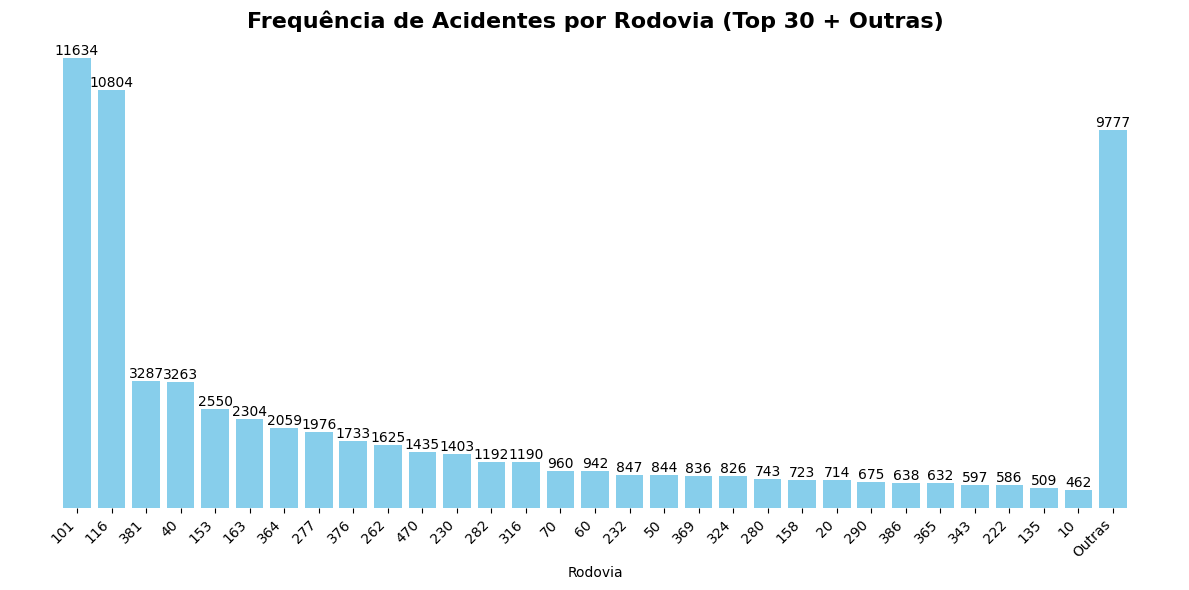

In [17]:
# Defina o número de principais rodovias que você deseja exibir
top_n = 30

# Contagem de acidentes por rodovia
contagem_por_rodovia = df_prf['br'].value_counts()

# Mantenha as principais rodovias e agrupe o restante em "Outras"
principais_rodovias = contagem_por_rodovia.head(top_n)
outras_rodovias = pd.Series(contagem_por_rodovia.iloc[top_n:].sum(), index=['Outras'])

# Concatene as principais rodovias com "Outras" e converta o índice em strings
contagem_resumida = pd.concat([principais_rodovias, outras_rodovias]).rename(lambda x: str(x))

# Crie o gráfico de barras
plt.figure(figsize=(12, 6))

# Remova as grades do gráfico
plt.grid(False)

# Remova as bordas do gráfico
plt.box(on=None)

# Crie as barras sem bordas
bars = plt.bar(contagem_resumida.index, contagem_resumida.values, color='skyblue', linewidth=0)  # Defina a cor das barras como azul e linewidth=0 para remover as bordas

# Adicione os valores acima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', (bar.get_x() + bar.get_width() / 2, height),
                 ha='center', va='bottom', fontsize=10)

# Remova a escala do eixo Y
plt.tick_params(axis='y', which='both', left=False)

# Defina o eixo Y para não ser exibido
plt.yticks([])

plt.xlabel('Rodovia')

# Aumente a fonte e coloque o título em negrito
plt.title(f'Frequência de Acidentes por Rodovia (Top {top_n} + Outras)', fontsize=16, fontweight='bold')

# Ajuste o espaço entre os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exiba o gráfico
plt.show()

## **gravidade dos acidentes (fatais, com feridos, sem vítimas).**

Agora, iremos realizar a análise e a visualização de dados relacionados à gravidade dos acidentes em rodovias federais. A lógica e as premissas utilizadas são as seguintes:

**Criação das Colunas de Categorias de Acidentes:**

* Serão criadas quatro novas colunas no DataFrame, da PRF, para categorizar os acidentes com base em sua gravidade. Para isso, foram consideradas as seguintes premissas:
  
  * **acidente_com_vitima_fatal:** Esta coluna é preenchida com True se houver pelo menos uma vítima fatal no acidente (mortos > 0).
  
  * **acidente_com_vitima:** Esta coluna é preenchida com True se o acidente não tiver vítimas fatais (mortos = 0) e houver pelo menos uma vítima com ferimentos (feridos > 0).
  
  * **acidente_sem_vitima:** Esta coluna é preenchida com True se o acidente não tiver vítimas fatais (mortos = 0), nenhum ferido (feridos = 0) e pelo menos uma pessoa saiu ilesa (ilesos > 0).
  
  * **acidente_sem_informacao:** Esta coluna é preenchida com True se todas as categorias anteriores de vítimas (mortos, feridos e ilesos) forem iguais a zero e houver pelo menos um registro como "ignorado" (ignorados > 0).

**Cálculo do Número de Acidentes em Cada Categoria:**

* Em seguida, é feito o calculo do número de acidentes em cada categoria de gravidade, somando os valores das colunas criadas anteriormente, com isso, teremos as seguintes informações.

  * **acidente_com_vitima_fatal:** Número de acidentes com vítimas fatais.

  * **acidente_com_vitima:** Número de acidentes com vítimas não fatais.

  * **acidente_sem_vitima:** Número de acidentes sem vítimas.

  * **acidente_sem_informacao:** Número de acidentes sem informações de vítimas.

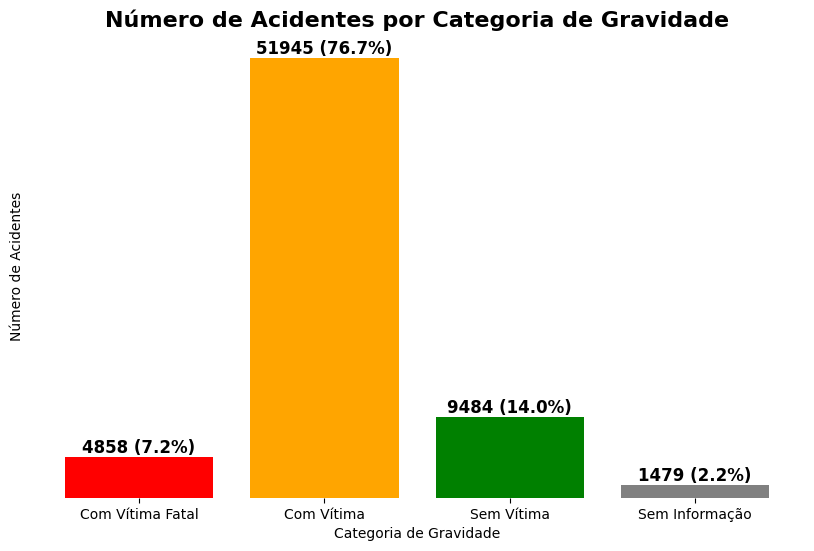

In [18]:
#criacao das colunas
df_prf['acidente_com_vitima_fatal'] = df_prf['mortos'] > 0
df_prf['acidente_com_vitima'] = (df_prf['mortos'] == 0) & (df_prf['feridos'] > 0)
df_prf['acidente_sem_vitima'] = (df_prf['mortos'] == 0) & (df_prf['feridos'] == 0) & (df_prf['ilesos'] >0)
df_prf['acidente_sem_informacao'] = (df_prf['mortos'] == 0) & (df_prf['feridos'] == 0) & (df_prf['ilesos'] == 0) & (df_prf['ignorados'] > 0)

# quantidades de registros por categoria
acidente_com_vitima_fatal = df_prf['acidente_com_vitima_fatal'].sum()
acidente_com_vitima = df_prf['acidente_com_vitima'].sum()
acidente_sem_vitima = df_prf['acidente_sem_vitima'].sum()
acidente_sem_informacao = df_prf['acidente_sem_informacao'].sum()
total_acidentes = df_prf.shape[0]



# Crie um gráfico de barras
plt.figure(figsize=(10, 6))
categorias = ['Com Vítima Fatal', 'Com Vítima', 'Sem Vítima', 'Sem Informação']
quantidades = [acidente_com_vitima_fatal, acidente_com_vitima, acidente_sem_vitima, acidente_sem_informacao]

# Crie as barras
bars = plt.bar(categorias, quantidades, color=['red', 'orange', 'green', 'gray'])

# Adicione os valores acima de cada barra
for bar, quantidade in zip(bars, quantidades):
    height = bar.get_height()
    plt.annotate(f'{quantidade} ({(quantidade/total_acidentes*100):.1f}%)',
                 (bar.get_x() + bar.get_width() / 2, height),
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

# Remova as grades do gráfico
plt.grid(False)

# Remova as referências do eixo Y
plt.tick_params(axis='y', which='both', left=False, labelleft=False)

# Remova a borda do gráfico
plt.box(on=None)

plt.xlabel('Categoria de Gravidade')
plt.ylabel('Número de Acidentes')
plt.title('Número de Acidentes por Categoria de Gravidade', fontsize=16, fontweight='bold')

plt.show()

In [19]:
print(f'acidente fatal {acidente_com_vitima_fatal}')
print(f'acidente com vitima {acidente_com_vitima}')
print(f'acidente sem vitima {acidente_sem_vitima}')
print(f'acidente sem informacao {acidente_sem_informacao}')


acidente fatal 4858
acidente com vitima 51945
acidente sem vitima 9484
acidente sem informacao 1479


# **4 - Identificação de Zonas de Alto Risco**

- Determine áreas (por exemplo, segmentos de rodovias específicos) com alto frequência de acidentes graves.
- Compare com a localização atual dos radares.

In [20]:
df01_prf = df_prf.copy()
df01_radar = df_radar.copy()

## **determinar areas**

**Agrupamento de Acidentes por Rodovia e KM da Rodovia.**
- no df_prf o nome da variavel onde esta o nome da rodovia se chama 'br', com seus valores inteiros. enquanto isso, no df_radar o nome da variavel onde esta o nome da rodovia se chama 'rodovia' e tem seus valores como object, isso ocorre por conta dos valores vierem com um prefixo 'BR-'. Portanto, para resolver isso foi feito uma formatacao do valores de df_prf, para ficarem igual ao df_radar.

- Calcular a frequência de acidentes com diferentes categorias de gravidade (vítima fatal, com vítima, sem vítima, sem informação) em cada segmento de rodovia e por km de cada rodovia.

- Nesse ponto, a variável `acidentes_por_rodovia_km` conterá as informações sobre cada segmento da rodovia em cada km quilômetro. Além disso, o agrupamento realizado irá incluir a contagem de acidentes em cada uma das diferentes categorias de gravidade.

- Após isso, o dataframe é ordenado com base no número de acidentes com vítimas fatais e acidentes com vítimas, em ordem decrescente, e, em seguida, mostra as 10 principais entradas com os maiores valores em ambas as categorias. Isso pode ajudar a identificar as rodovias e quilômetros mais críticos em termos de acidentes graves.

In [21]:
# Formatar valores da variável "br" para que fique igual ao valores da tabela de radares.
df01_prf['br'] = df01_prf['br'].apply(lambda x: f'BR-{int(x):d}' if not pd.isna(x) else x)

# Criar uma variável que representa a rodovia e o km da rodovia
df01_prf['rodovia_km'] = df01_prf['br'].astype(str) + ', km-' + df01_radar['km'].astype(str)

# Agrupe os acidentes por "br" (número da rodovia) e "km" (quilômetro da rodovia)
acidentes_por_rodovia_km = df01_prf.groupby('rodovia_km')[
    ['acidente_com_vitima_fatal', 'acidente_com_vitima', 'acidente_sem_vitima', 'acidente_sem_informacao']
].sum().reset_index()

# Alterar o nome da coluna "br" para "rodovia"
acidentes_por_rodovia_km.rename(columns={'br': 'rodovia'}, inplace=True)

In [22]:
# Filtrar acidentes por KM das Rodovias ordenando por maior ocorrencia de vítimas fatais e vítimas.
acidentes_por_rodovia_km.sort_values(['acidente_com_vitima_fatal','acidente_com_vitima'], ascending = False).head(10)

,rodovia_km,acidente_com_vitima_fatal,acidente_com_vitima,acidente_sem_vitima,acidente_sem_informacao
174,"BR-116, km-166",1,1,0,0
201,"BR-116, km-277",1,1,0,0
224,"BR-116, km-409",1,1,0,0
237,"BR-116, km-500",1,1,0,0
240,"BR-116, km-504",1,1,0,0
254,"BR-116, km-637",1,1,0,0
1,"BR-10, km-100",1,0,0,0
3,"BR-10, km-186",1,0,0,0
4,"BR-10, km-195",1,0,0,0
15,"BR-101, km-138",1,0,0,0


## **Comparar com a localização atual dos radares.**


- Para esta análise, sera necessário envolver o cruzamento de informações sobre acidentes de trânsito em rodovias federais com dados de radares localizados nessas rodovias. Para isso, foram realizadas as etapas abaixo:

* **Criação da Variável "rodovia_km":** Foi criada uma nova variável chamada "rodovia_km" no df01_radar. Essa variável combina informações da "rodovia" e do "km" da rodovia, transformando essas informações em uma única identificação para cada radar.

* **Agrupamento de Radares por "rodovia" e "km":** Os radares foram agrupados com base na variável "rodovia_km" para calcular a contagem de radares em cada km das rodovias. O resultado foi armazenado no DataFrame radares_por_rodovia_km, incluindo a quantidade de radares em cada grupo.

* **União de Dados de Acidentes e Radares:** Os dados de acidentes (anteriormente analisados) e os dados de radares foram unidos por meio da variável "rodovia_km", garantindo que as informações correspondessem às mesmas localizações nas rodovias.

* **Preenchimento de Valores NaN:** Como nem todos os locais de acidentes tinham radares correspondentes, os valores NaN (sem correspondência) na tabela resultante foram preenchidos com "0". Isso significa que, quando não havia radar em um local de acidente, o número de radares foi considerado zero.

* **Seleção de Colunas Relevantes:** A tabela resultante foi reduzida às colunas mais relevantes, incluindo "rodovia_km," a quantidade de acidentes com vítimas fatais, a quantidade de acidentes com vítimas e a quantidade de radares.

* **Top 10 Rodovias com Mais Acidentes Graves:** A tabela final foi classificada com base na quantidade de acidentes com vítimas fatais e a quantidade de acidentes com vítimas, em ordem decrescente. Os 10 principais resultados representam as rodovias e quilômetros com os maiores números de acidentes graves. Com isso, é possível avaliar a quantidade de radar nesses trechos de rodovia considerados mais críticos.

Essa análise pode fornecer insights valiosos sobre as áreas mais críticas em termos de acidentes de trânsito em rodovias federais e destacar onde a presença de radares pode ser particularmente importante para melhorar a segurança das rodovias.

In [23]:
# Criar uma variável que representa a rodovia e o km da rodovia
df01_radar['rodovia_km'] = df01_radar['rodovia'].astype(str) + ', km-' + df_prf['km'].astype(str)

# Agrupar os radares por "rodovia" e "km" e calcule a contagem de radares em cada grupo
radares_por_rodovia_km = df01_radar.groupby(['rodovia_km']).size().reset_index(name='quantidade_radares')

In [24]:
# Realizar o join entre as tabelas de acidentes e radares
acidentes_radar_por_rodovia = acidentes_por_rodovia_km.merge(radares_por_rodovia_km, on=['rodovia_km'], how='left')

# Preencher os valores NaN (sem correspondência de radares) com "0"
acidentes_radar_por_rodovia.fillna(0, inplace=True)

In [25]:
selec_colunas = ['rodovia_km','acidente_com_vitima_fatal','acidente_com_vitima','quantidade_radares']

top_10_rodovias = acidentes_radar_por_rodovia[selec_colunas].sort_values(['acidente_com_vitima_fatal','acidente_com_vitima'], ascending = False).head(10)
top_10_rodovias

,rodovia_km,acidente_com_vitima_fatal,acidente_com_vitima,quantidade_radares
174,"BR-116, km-166",1,1,0.0
201,"BR-116, km-277",1,1,1.0
224,"BR-116, km-409",1,1,1.0
237,"BR-116, km-500",1,1,0.0
240,"BR-116, km-504",1,1,0.0
254,"BR-116, km-637",1,1,0.0
1,"BR-10, km-100",1,0,0.0
3,"BR-10, km-186",1,0,0.0
4,"BR-10, km-195",1,0,0.0
15,"BR-101, km-138",1,0,0.0


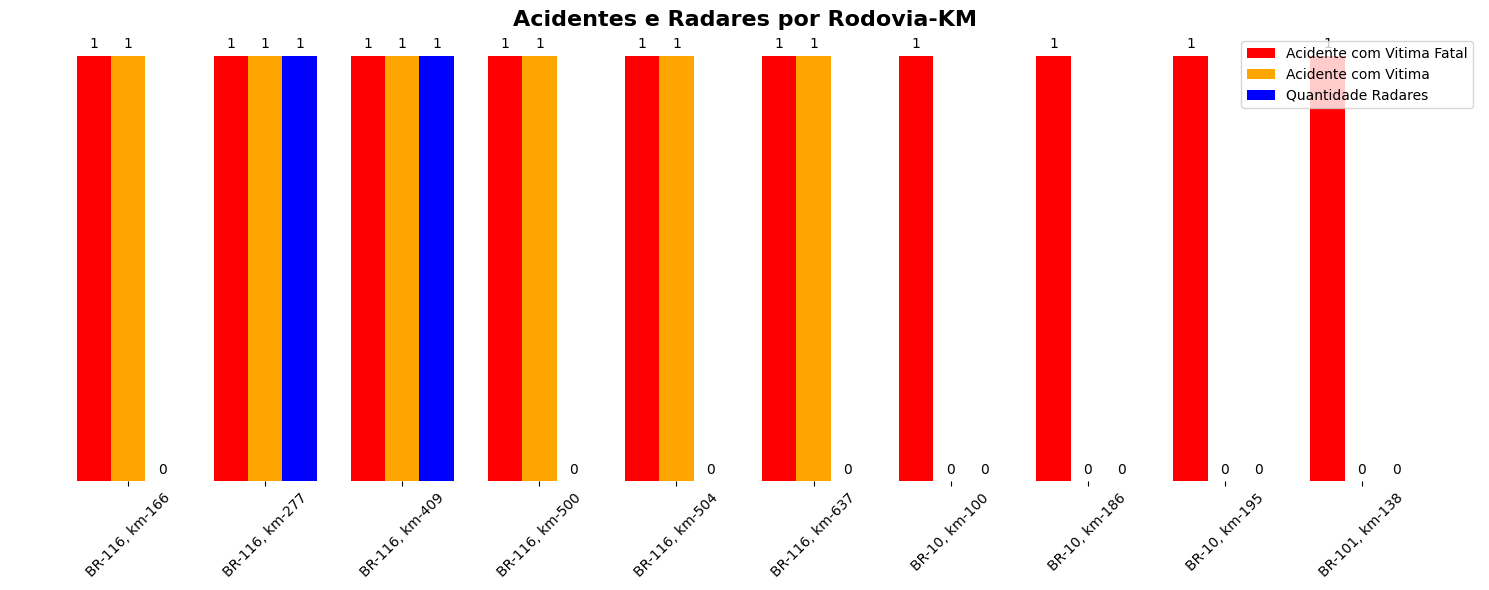

In [26]:
rodovias_km = tuple(top_10_rodovias['rodovia_km'].to_list())
colors = ['red', 'orange', 'blue']
labels = ['Acidente com Vitima Fatal', 'Acidente com Vitima', 'Quantidade Radares']

data = {
    label: {
        'data': tuple(top_10_rodovias[column].to_list()),
        'color': color
    }
    for label, column, color in zip(labels, ['acidente_com_vitima_fatal', 'acidente_com_vitima', 'quantidade_radares'], colors)
}

x = range(len(rodovias_km))
width = 0.25

fig, ax = plt.subplots(figsize=(15, 6))

for i, (label, info) in enumerate(data.items()):
    rects = ax.bar([pos + i * width for pos in x], info['data'], width, label=label, color=info['color'])
    ax.bar_label(rects, padding=3)

ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Acidentes e Radares por Rodovia-KM', fontsize=16, fontweight='bold')
ax.set_xticks([pos + width for pos in x], rodovias_km)
ax.legend(loc='upper right')
plt.xticks(rotation=45)

plt.tight_layout()

In [27]:
# Criar nova tabela com a causa mais comum por rodovia_km
motivo_mais_comum_por_km = df01_prf.groupby('rodovia_km')['causa_acidente'].agg(lambda x: x.mode().iloc[0]).reset_index()

motivo_mais_comum_por_km = motivo_mais_comum_por_km.merge(acidentes_por_rodovia_km[['rodovia_km', 'acidente_com_vitima_fatal', 'acidente_com_vitima']], on='rodovia_km', how='left')


# Visualizar
motivo_mais_comum_por_km = motivo_mais_comum_por_km.sort_values(['acidente_com_vitima_fatal','acidente_com_vitima'], ascending = False).head(10)
motivo_mais_comum_por_km

,rodovia_km,causa_acidente,acidente_com_vitima_fatal,acidente_com_vitima
174,"BR-116, km-166",Conversão proibida,1,1
201,"BR-116, km-277",Ausência de reação do condutor,1,1
224,"BR-116, km-409",Acessar a via sem observar a presença dos outr...,1,1
237,"BR-116, km-500",Ausência de reação do condutor,1,1
240,"BR-116, km-504",Condutor Dormindo,1,1
254,"BR-116, km-637",Acessar a via sem observar a presença dos outr...,1,1
1,"BR-10, km-100",Ultrapassagem Indevida,1,0
3,"BR-10, km-186",Condutor deixou de manter distância do veículo...,1,0
4,"BR-10, km-195",Ausência de reação do condutor,1,0
15,"BR-101, km-138",Trafegar com motocicleta (ou similar) entre as...,1,0


#**5 - Análise de Proximidade**

- Calcule a distância média dos acidentes até o radar mais próximo.

##**Calcule a distância média dos acidentes até o radar mais próximo.**

Nesta análise, calculamos a distância média dos acidentes até o radar mais próximo. Seguimos os seguintes passos:

1. Coletamos as coordenadas geográficas dos acidentes e radares.

2. Usamos a biblioteca geopy para calcular as distâncias.

3. Criamos uma Árvore de Pesquisa Espacial para otimizar as buscas.
  
  - Uma Árvore de Pesquisa Espacial é uma estrutura que ajuda a encontrar informações em espaços multidimensionais, como coordenadas geográficas. Ela é útil para pesquisas eficientes em dados com componentes espaciais.

4. Calculamos as distâncias mínimas para cada acidente.

5. Visualizamos a distribuição das distâncias por meio de um histograma.

Essa análise ajuda a entender como a proximidade dos radares está relacionada aos acidentes, auxiliando na segurança viária.

In [28]:
from scipy.spatial import cKDTree

# Criar a árvore de pesquisa espacial a partir das coordenadas dos radares
radares_coords = df01_radar[['latitude', 'longitude']].to_numpy()
kdtree = cKDTree(radares_coords)

# Função para calcular a distância mínima
def calcular_distancia_minima(coord_acidente, kdtree):
    dist_minima, _ = kdtree.query(coord_acidente, k=1)
    return dist_minima

# Usar apply para calcular as distâncias e adicionar uma coluna 'distancia_km' à tabela de acidentes
df01_prf['distancia_radar_km'] = df01_prf.apply(lambda row: calcular_distancia_minima((row['latitude'], row['longitude']), kdtree), axis=1)

In [29]:
df01_prf['distancia_radar_km'].describe()

,distancia_radar_km
count,67766.000000
mean,2.564581
std,4.061159
min,0.000022
25%,0.035944
50%,0.243293
75%,3.381959
max,14.466943


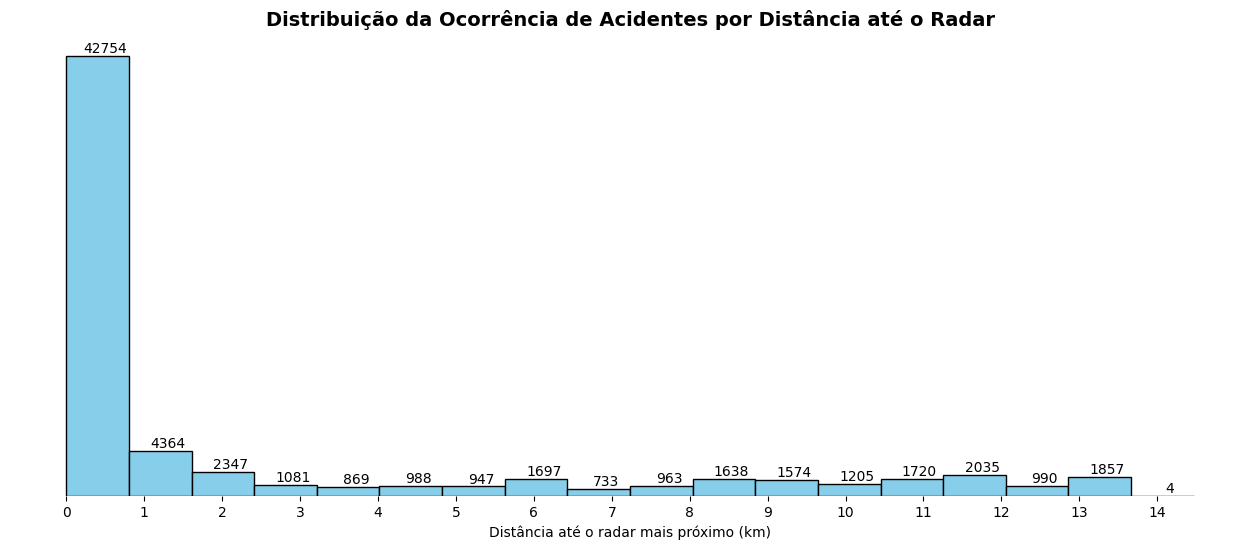

In [30]:
# Defina o número de bins (intervalos) no histograma
num_bins = 18

# Crie o histograma
fig, ax = plt.subplots(figsize=(16, 6))  # Aumente as dimensões da figura
n, bins, patches = ax.hist(df01_prf['distancia_radar_km'], bins=num_bins, color='skyblue', edgecolor='black')

# Adicione rótulos e título ao gráfico
plt.xlabel('Distância até o radar mais próximo (km)')
plt.ylabel('Número de Acidentes')
plt.title('Distribuição da Ocorrência de Acidentes por Distância até o Radar', fontsize=14, fontweight='bold')  # Adicione negrito ao título

# Remova as margens do gráfico
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remova a referência da coluna Y
ax.get_yaxis().set_visible(False)

# Adicione as quantidades de cada bin em cima das barras
for i in range(num_bins):
    if n[i] > 0:
        ax.text(bins[i] + 0.5, n[i], str(int(n[i])), ha='center', va='bottom')  # Remova as casas decimais

# Remova as casas decimais dos valores no eixo Y
plt.xticks(range(int(min(df01_prf['distancia_radar_km'])), int(max(df01_prf['distancia_radar_km']) + 1)))

# Exiba o histograma
plt.show()

In [31]:
# Filtrar os acidentes com distância menor que 1 km
acidentes_proximos = df01_prf[df01_prf['distancia_radar_km'] < 1]

# Contar os motivos mais comuns
top_3_motivos = acidentes_proximos['causa_acidente'].value_counts().head(10)

# Exibir o resultado
print("Top 3 motivos mais comuns em acidentes a menos de 1 km de um radar:")
print(top_3_motivos)


Top 3 motivos mais comuns em acidentes a menos de 1 km de um radar:
causa_acidente
Reação tardia ou ineficiente do condutor                     7002
Ausência de reação do condutor                               6479
Acessar a via sem observar a presença dos outros veículos    3688
Velocidade Incompatível                                      3101
Condutor deixou de manter distância do veículo da frente     2650
Manobra de mudança de faixa                                  2549
Ingestão de álcool pelo condutor                             2258
Demais falhas mecânicas ou elétricas                         1936
Condutor Dormindo                                            1408
Transitar na contramão                                       1231
Name: count, dtype: int64


In [32]:
top_3_motivos_df = top_3_motivos.reset_index()
top_3_motivos_df.columns = ['motivo', 'ocorrencias']
top_3_motivos_df


,motivo,ocorrencias
0,Reação tardia ou ineficiente do condutor,7002
1,Ausência de reação do condutor,6479
2,Acessar a via sem observar a presença dos outr...,3688
3,Velocidade Incompatível,3101
4,Condutor deixou de manter distância do veículo...,2650
5,Manobra de mudança de faixa,2549
6,Ingestão de álcool pelo condutor,2258
7,Demais falhas mecânicas ou elétricas,1936
8,Condutor Dormindo,1408
9,Transitar na contramão,1231


#**6 - principal causa de acidente em cada rodovia**

In [33]:
# Agrupar por rodovia e pegar o motivo mais comum (moda) em cada uma
motivo_por_rodovia = df01_prf.groupby('br')['causa_acidente'].agg(lambda x: x.mode().iloc[0]).reset_index()

# Renomear colunas para clareza
motivo_por_rodovia.columns = ['rodovia', 'motivo_mais_comum']

# Exibir resultado
motivo_por_rodovia


,rodovia,motivo_mais_comum
0,BR-0,Reação tardia ou ineficiente do condutor
1,BR-10,Acessar a via sem observar a presença dos outr...
2,BR-101,Reação tardia ou ineficiente do condutor
3,BR-104,Acessar a via sem observar a presença dos outr...
4,BR-110,Ausência de reação do condutor
5,BR-116,Reação tardia ou ineficiente do condutor
6,BR-122,Condutor deixou de manter distância do veículo...
7,BR-135,Reação tardia ou ineficiente do condutor
8,BR-146,Velocidade Incompatível
9,BR-153,Reação tardia ou ineficiente do condutor


#**7 -  Análise Temporal**

##**frequencia de acidentes por mes**

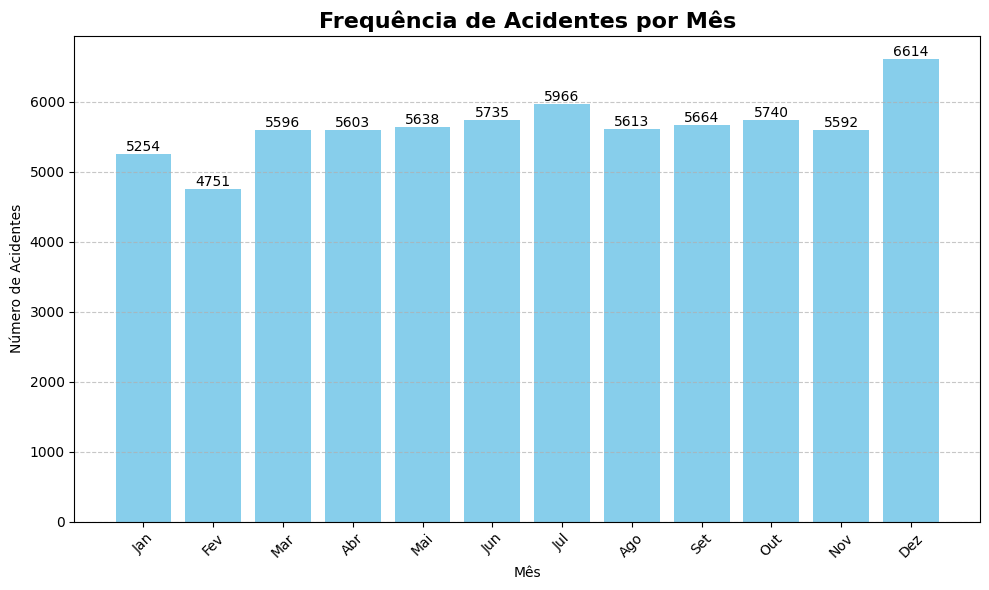

In [36]:
# Extrair o mês da coluna 'data_inversa'
df01_prf['mes'] = df01_prf['data_inversa'].dt.month

# Contar a frequência de acidentes por mês
acidentes_por_mes = df01_prf['mes'].value_counts().sort_index()

# Mapear números dos meses para nomes
meses = {
    1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun',
    7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
}
acidentes_por_mes.index = acidentes_por_mes.index.map(meses)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(acidentes_por_mes.index, acidentes_por_mes.values, color='skyblue')

# Adicionar os valores acima das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             '%d' % int(height),
             ha='center', va='bottom')

plt.xlabel('Mês')
plt.ylabel('Número de Acidentes')
plt.title('Frequência de Acidentes por Mês', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##**frequencia de acidentes em cada hora do dia**

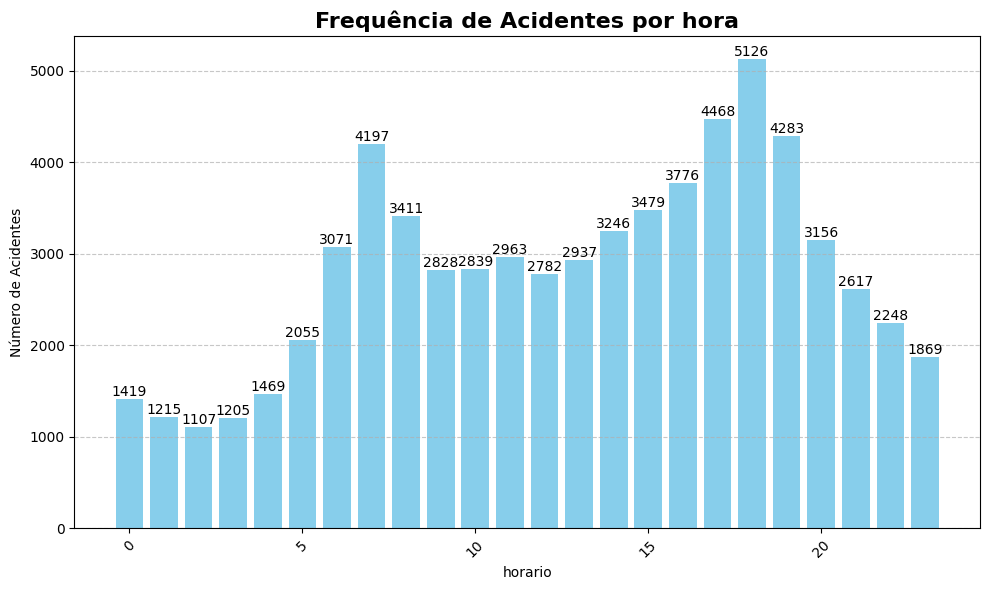

In [37]:
# Contar a frequência de acidentes por mês
acidentes_h = df01_prf['horario'].dt.hour.value_counts().sort_index()


# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(acidentes_h.index, acidentes_h.values, color='skyblue')

# Adicionar os valores acima das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             '%d' % int(height),
             ha='center', va='bottom')

plt.xlabel('horario')
plt.ylabel('Número de Acidentes')
plt.title('Frequência de Acidentes por hora', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Você pode adaptar esse código para analisar por dia da semana (`df01_prf['dia_semana'].value_counts()`) ou por hora do dia (`df01_prf['horario'].dt.hour.value_counts()`).

# **8 - analise das variaveis categoricas**

/tmp/ipython-input-788523180.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(counts.index, rotation=45, ha='right')
/tmp/ipython-input-788523180.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(counts.index, rotation=45, ha='right')
/tmp/ipython-input-788523180.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(counts.index, rotation=45, ha='right')
/tmp/ipython-input-788523180.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(counts.index, rotation=45, ha='right')
/tmp/ipython-input-788523180.py:35: UserWarning: set_ticklabels() should only be used with a fixed numbe

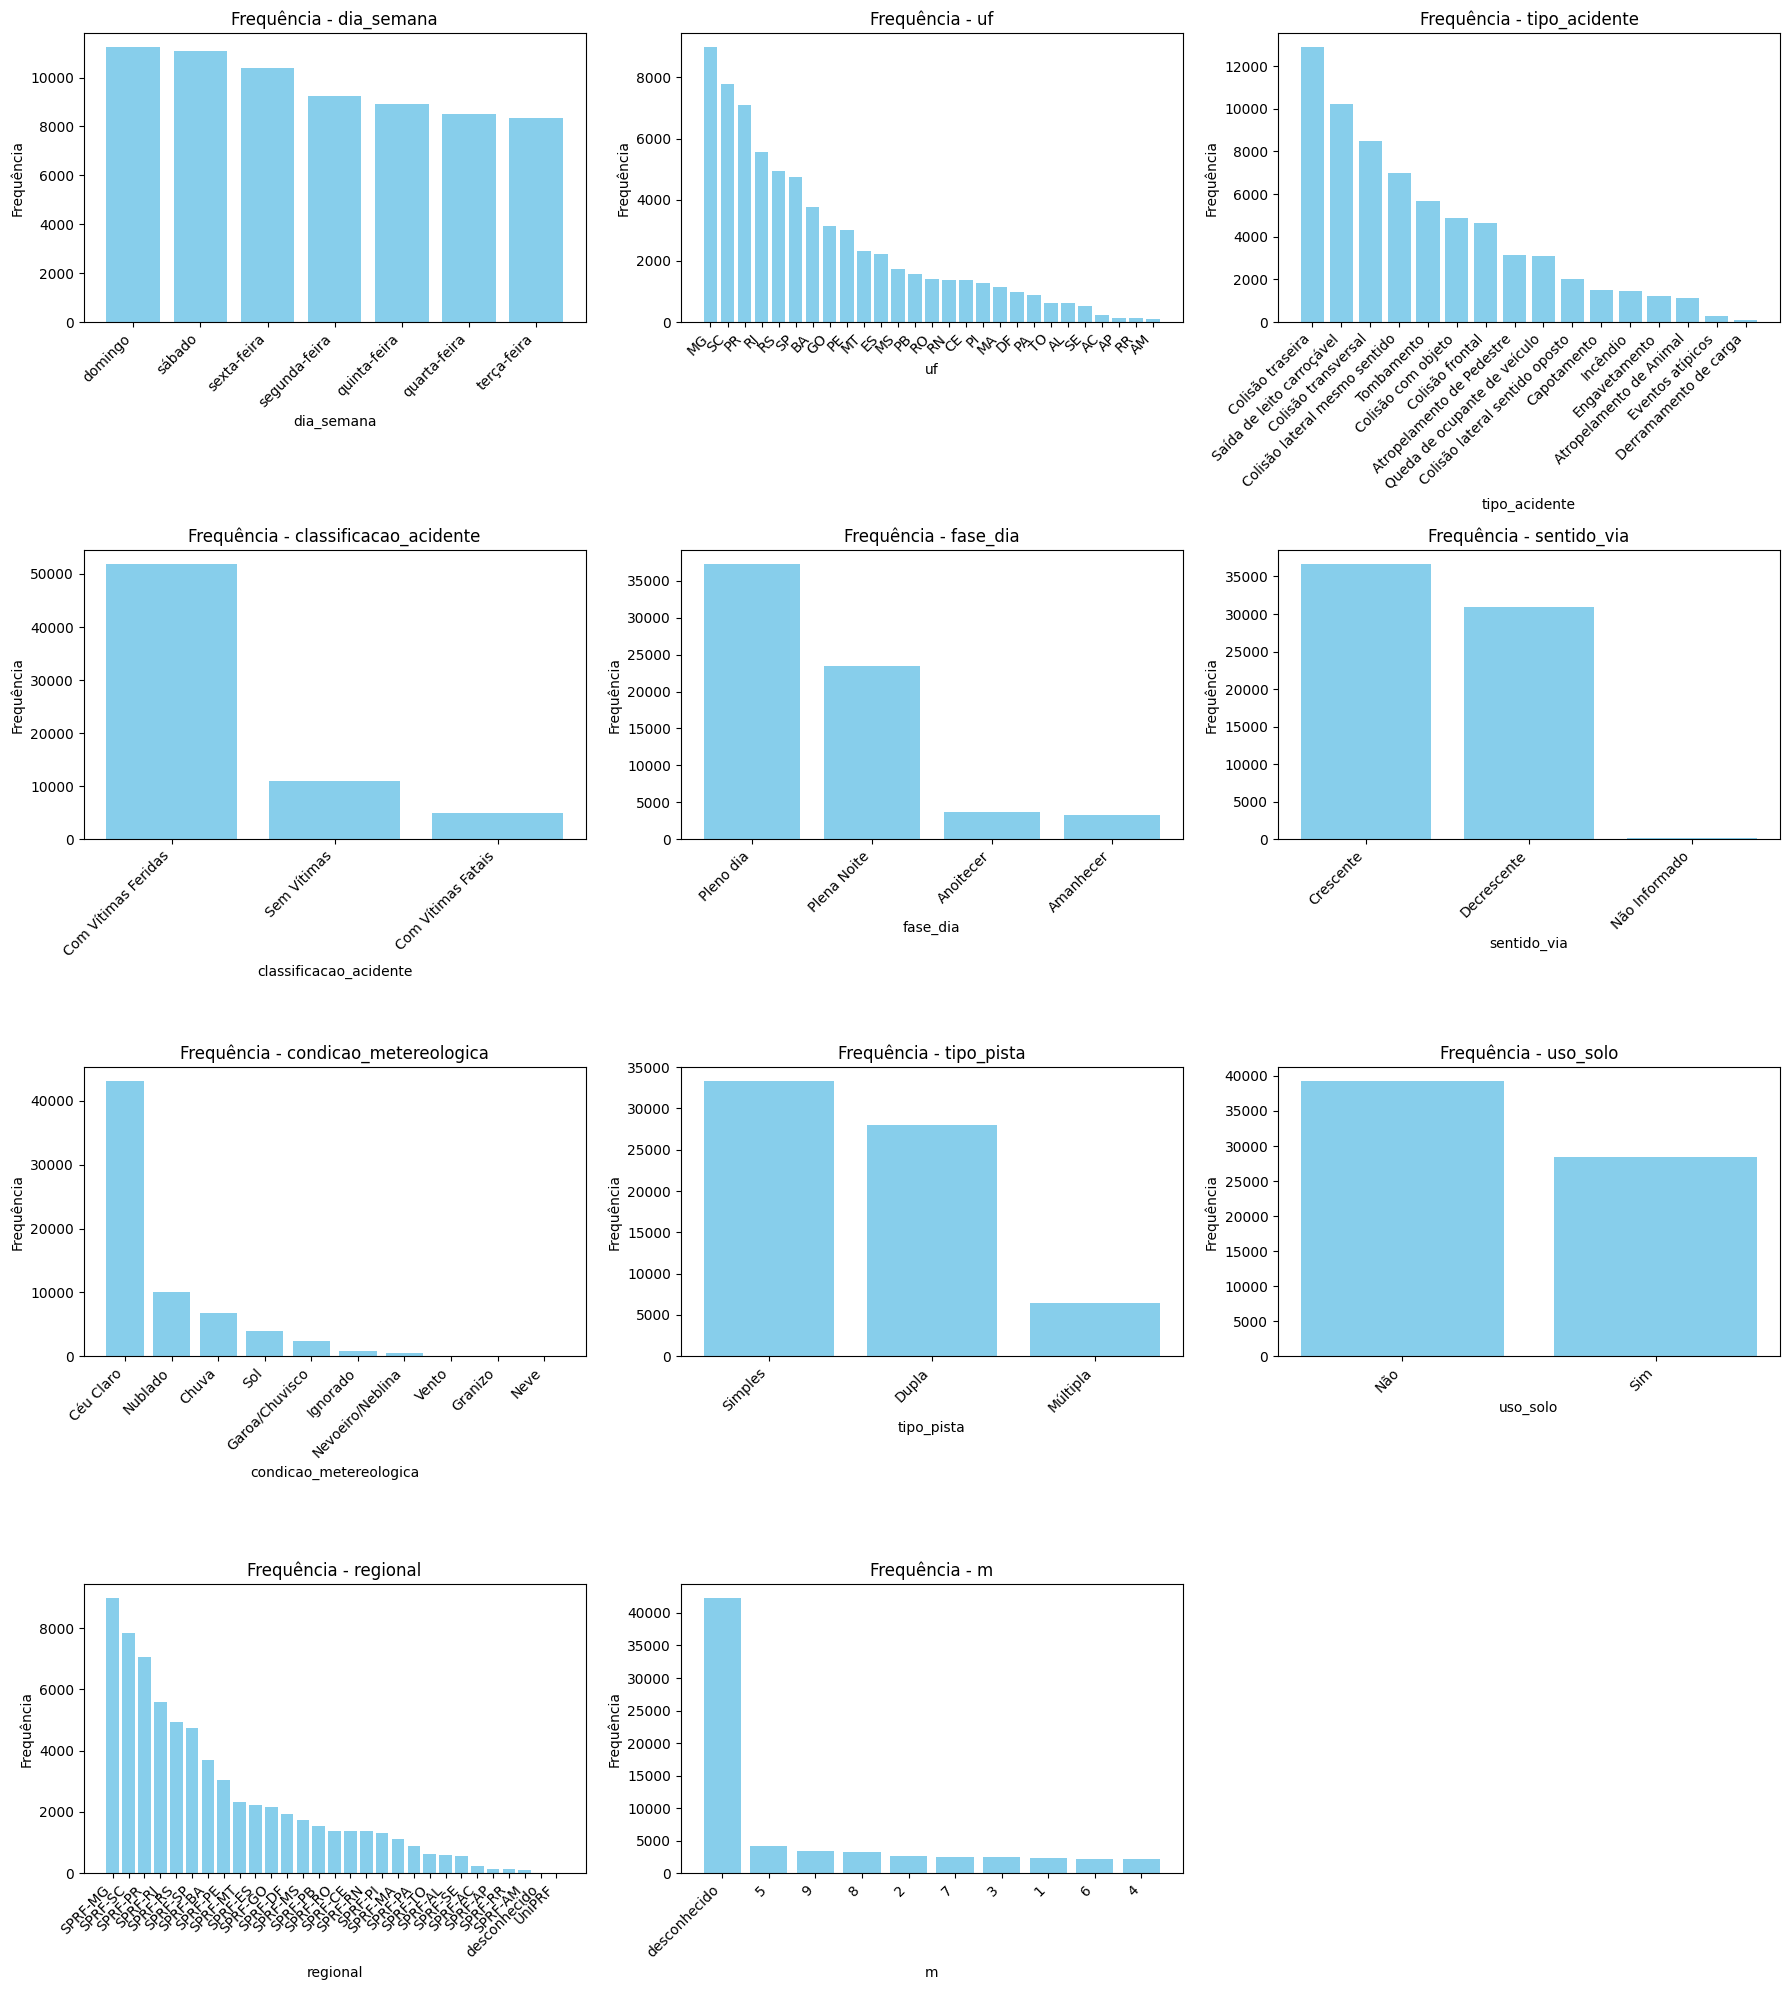

In [34]:

def plot_categorical_frequencies(df, corte_cardinalidade=30):
    # Gera metadados
    metadados = []
    for coluna in df.columns:
        metadados.append({
            'Variável': coluna,
            'Tipo': df[coluna].dtype,
            'Cardinalidade': df[coluna].nunique()
        })

    df_metadados = pd.DataFrame(metadados)

    # Seleciona variáveis categóricas com cardinalidade baixa
    variaveis_categoricas = df_metadados[
        (df_metadados['Cardinalidade'] <= corte_cardinalidade) &
        (df_metadados['Tipo'] == 'object')
    ]['Variável'].tolist()

    # Número de colunas e linhas para os subplots
    n_colunas = 3
    n_linhas = (len(variaveis_categoricas) + n_colunas - 1) // n_colunas

    # Criar os subplots
    fig, axs = plt.subplots(n_linhas, n_colunas, figsize=(6 * n_colunas, 5 * n_linhas))
    axs = axs.flatten()

    # Plotar cada variável
    for i, var in enumerate(variaveis_categoricas):
        ax = axs[i]
        counts = df[var].value_counts()
        ax.bar(counts.index, counts.values, color='skyblue')
        ax.set_title(f'Frequência - {var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Frequência')
        ax.set_xticklabels(counts.index, rotation=45, ha='right')

    # Remover subplots vazios
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

# Exemplo de uso:
plot_categorical_frequencies(df01_prf, corte_cardinalidade=30)


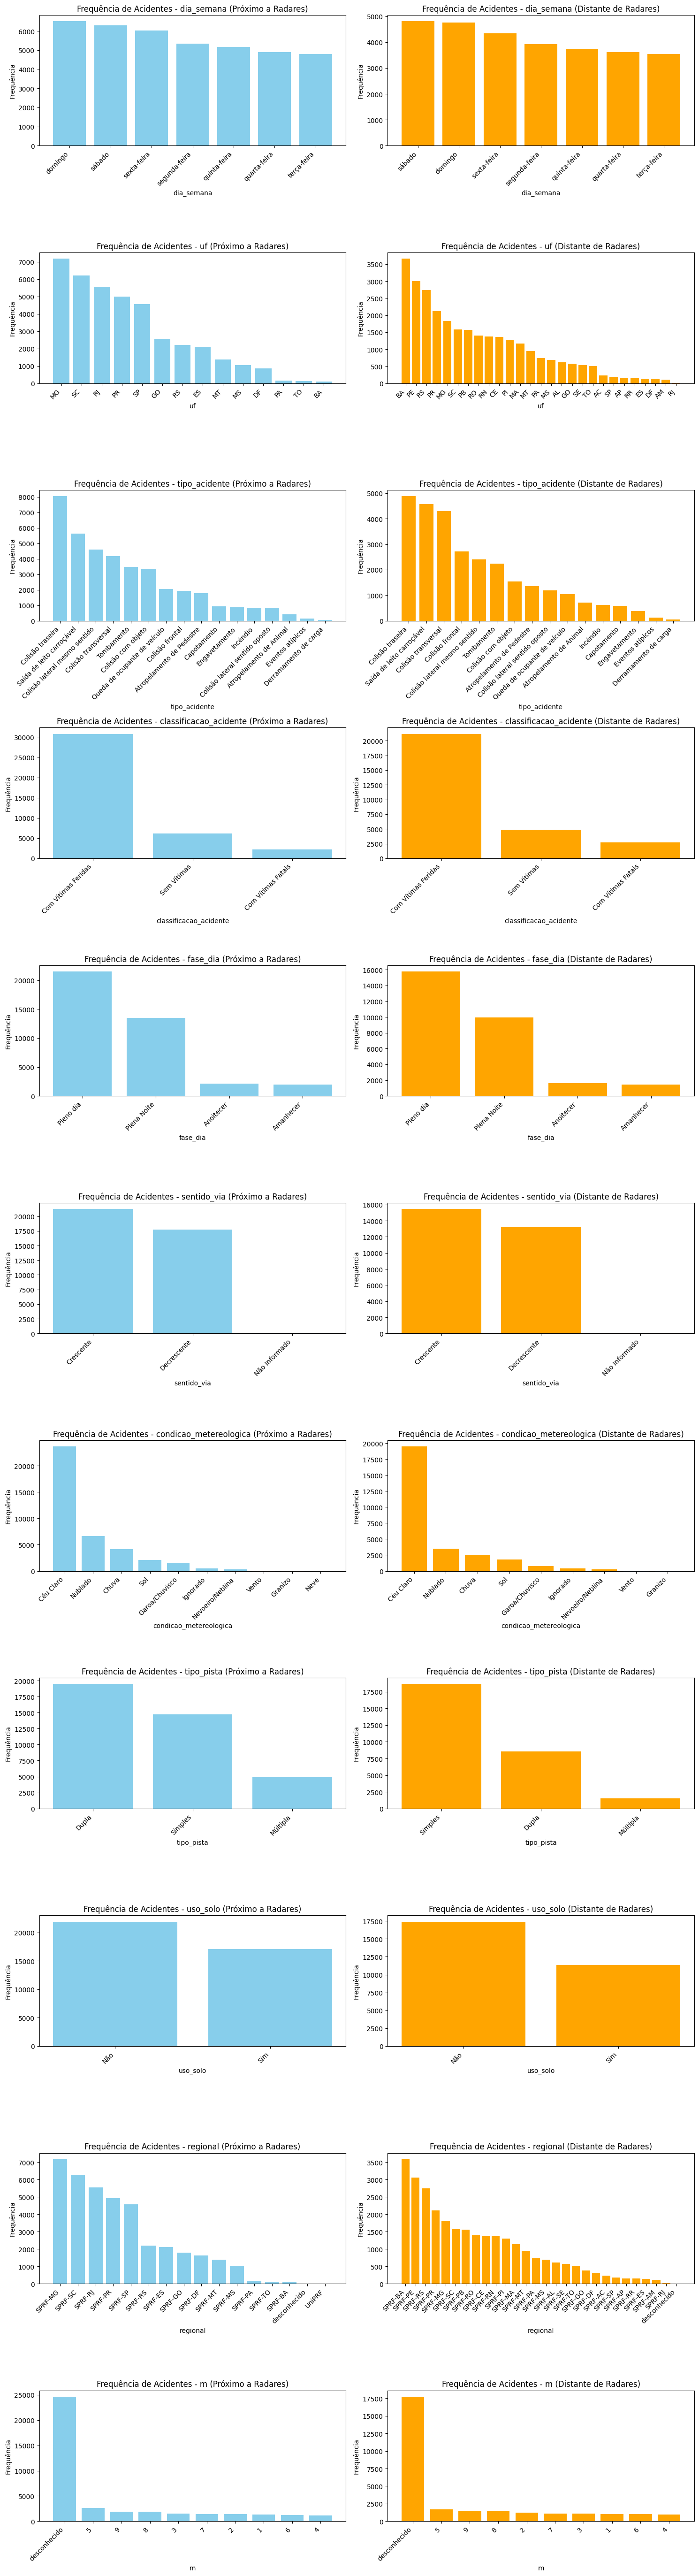

In [35]:

def plot_categorical_frequencies(df, corte_cardinalidade=30):
    # Gera metadados para o DataFrame
    metadados = []
    for coluna in df.columns:
        metadados.append({
            'Variável': coluna,
            'Tipo': df[coluna].dtype,
            'Cardinalidade': df[coluna].nunique()
        })

    df_metadados = pd.DataFrame(metadados)

    # Filtra colunas com cardinalidade menor ou igual ao corte e tipos não numéricos
    variaveis_categoricas = df_metadados[(df_metadados['Cardinalidade'] <= corte_cardinalidade) & (df_metadados['Tipo'] == 'object')]

    # Calcula o número de linhas e colunas para os subplots
    n_linhas = len(variaveis_categoricas)
    n_colunas = 2  # Você pode ajustar o número de colunas conforme necessário

    # Cria subplots
    fig, axs = plt.subplots(n_linhas, n_colunas, figsize=(15, 5 * n_linhas))

    for i, (idx, linha) in enumerate(variaveis_categoricas.iterrows()):
        var = linha['Variável']
        ax = axs[i]

        for j, radar_proximity in enumerate(['Próximo a Radares', 'Distante de Radares']):
            ax[j].set_title(f'Frequência de Acidentes - {var} ({radar_proximity})')
            ax[j].set_xlabel(var)
            ax[j].set_ylabel('Frequência')

            if radar_proximity == 'Próximo a Radares':
                data = df[df['distancia_radar_km'] <= 0.5]
            else:
                data = df[df['distancia_radar_km'] > 0.5]

            x = range(len(data[var].value_counts().index))
            ax[j].bar(x, data[var].value_counts().values, color='skyblue' if radar_proximity == 'Próximo a Radares' else 'orange')
            ax[j].set_xticks(x)
            ax[j].set_xticklabels(data[var].value_counts().index, rotation=45, ha='right')  # Rotação dos rótulos do eixo x

    plt.tight_layout()
    plt.show()

# Chame a função com o DataFrame desejado (no seu caso, df02_prf)
plot_categorical_frequencies(df01_prf, corte_cardinalidade=30)

#**9 - Conclusões / Recomendações / Insights**

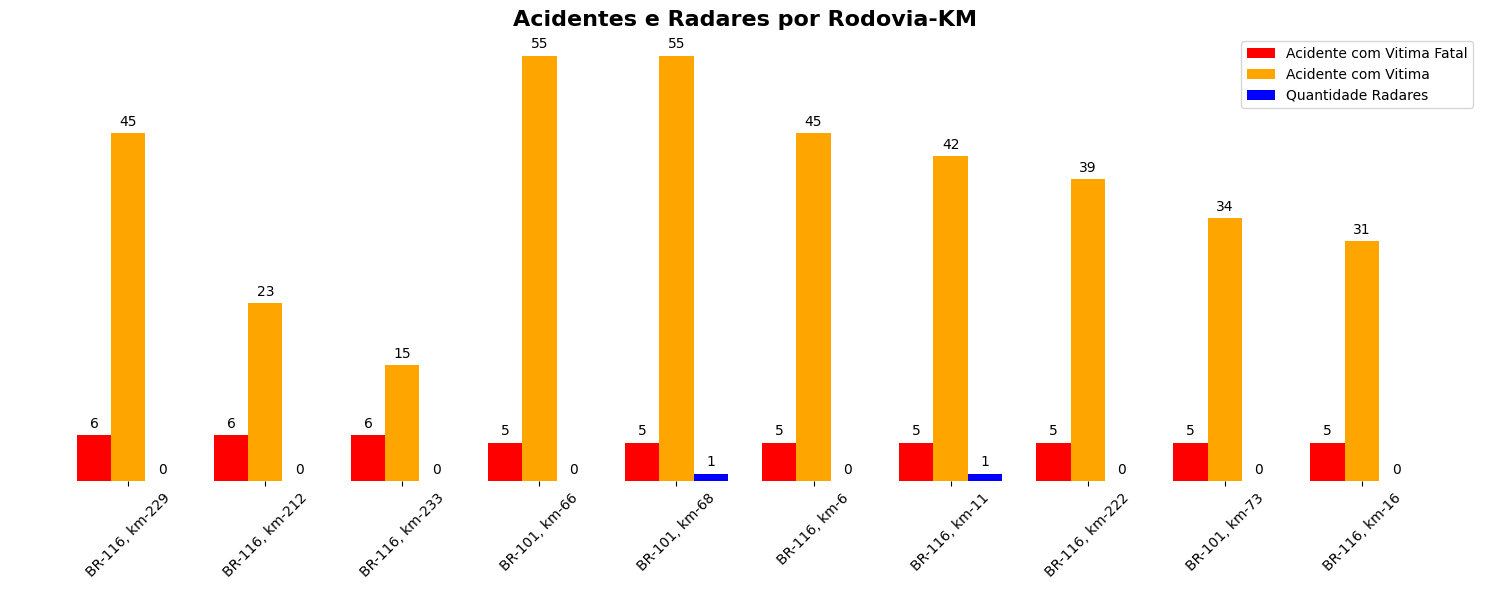


- A partir do gráfico, fica clara a necessidade de uma analise mais precisa sobre as rodovias BR-101 e BR-116, onde vem ocorrendo diversos acidentes e com pouco ou nenhum radar na regiao. Os quilômetros exatos, como "km-66", "km-68", "km-229" e "km-212", também são indicativos de áreas específicas propensas a acidentes.


- 115 rodovias federais têm registros de acidentes na base de dados analisada.

- A BR-101 é a rodovia com o maior número de registros de acidentes, totalizando 11.634 registros.

- A quantidade de acidentes registrados nas BR-101 e BR-116 representa 33,11% do total de acidentes.

- Dentre essas rodovias, os motivos mais presentes são: acessar a via sem observar a presença de outro condutor e reação tardia ou ineficiente do condutor.

- Necessidade de Fiscalização: a ausência de radares em muitos trechos críticos destaca a necessidade de medidas de fiscalização e controle de velocidade nessas áreas, para reduzir o número de acidentes com vítimas.

- Os acidentes com vítimas representam 76,7%; os acidentes sem vítimas, 14%; e os acidentes com vítimas fatais, 7,2%.

- 42.754 acidentes ocorrem a menos de 1 km de um radar.

- Em média, os acidentes ocorrem a 2,56 km de distância de um radar.

- Os motivos que mais causam acidentes a menos de 1 km de um radar são:

  - Reação tardia ou ineficiente do condutor: 7.002 ocorrências

  - Ausência de reação do condutor: 6.479 ocorrências

  - Acessar a via sem observar a presença dos outros veículos: 3.688 ocorrências

  - Velocidade incompatível: 3.101 ocorrências

- Apesar de uma grande quantidade de acidentes ocorrer a menos de 1 km de um radar, as principais causas nesses locais parecem estar mais relacionadas a falhas humanas na reação ou atenção, e não diretamente à velocidade incompatível, embora esta última ainda seja uma causa relevante. Isso pode indicar que a presença do radar influencia a velocidade, mas outros fatores de comportamento do motorista ainda contribuem para acidentes próximos.

- Em acidentes distantes de radares, há uma proporção maior de ocorrências com vítimas fatais, podendo estar relacionado com a velocidade.

- Em acidentes próximos a radares, “Dupla” é o tipo mais comum; enquanto em acidentes distantes, “Simples” lidera.

- A regional SPRF-MG é a mais comum em acidentes próximos a radares, enquanto a SPRF-BA lidera em acidentes distantes.

- MG, SC, PR, RJ, RS e SP são os estados com maior número de acidentes.

- Colisão traseira, saída do leito carroçável e colisão transversal são os tipos mais frequentes de acidentes em geral.

- A maior parte dos acidentes ocorre durante o dia e com céu claro.
- As principais causas de acidentes nas rodovias envolvem falhas humanas.
- durante o ano, o maior numero de acidentes ocorreu no mes de dezembro
- o maior numero de acidentes ocorre entre as 5 e 10 da manha e entre as 15 e 20 horas, principalmente as 7 horas e as 18 horas. esses horarios estao ligados com os famosos 'horarios de pico' nas cidades.

